In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data

In [ ]:
olympic = pd.read_csv('athlete_events.csv')

# Column and data selection


In [ ]:
hundred_m = olympic[olympic['Event'] == "Athletics Men's 100 metres"]
hundred_f = olympic[olympic['Event'] == "Athletics Women's 100 metres"]

two_h_m = olympic[olympic['Event'] == "Athletics Men's 200 metres"]
two_h_f = olympic[olympic['Event'] == "Athletics Women's 200 metres"]

four_h_m = olympic[olympic['Event'] == "Athletics Men's 400 metres"]
four_h_f = olympic[olympic['Event'] == "Athletics Women's 400 metres"]

eight_h_m = olympic[olympic['Event'] == "Athletics Men's 800 metres"]
eight_h_f = olympic[olympic['Event'] == "Athletics Women's 800 metres"]

oneandhalfk_m = olympic[olympic['Event'] == "Athletics Men's 1,500 metres"]
oneandhalfk_f = olympic[olympic['Event'] == "Athletics Women's 1,500 metres"]

fivek_m = olympic[olympic['Event'] == "Athletics Men's 5,000 metres"]
fivek_f = olympic[olympic['Event'] == "Athletics Women's 5,000 metres"]

tenk_m = olympic[olympic['Event'] == "Athletics Men's 10,000 metres"]
tenk_f = olympic[olympic['Event'] == "Athletics Women's 10,000 metres"]

marathon_m = olympic[olympic['Event'] == "Athletics Men's Marathon"]
marathon_f = olympic[olympic['Event'] == "Athletics Women's Marathon"]

In [ ]:
runners_all = pd.concat([hundred_m, hundred_f, two_h_m, two_h_f, four_h_m, four_h_f, eight_h_m, eight_h_f, oneandhalfk_m, oneandhalfk_f, fivek_m, fivek_f, tenk_m, tenk_f, marathon_m, marathon_f])

useful_columns = ['ID', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Event', 'Medal']

runners = runners_all[useful_columns]

runners = runners[runners['Year'] > 1980]

runners

,ID,Sex,Age,Height,Weight,Year,Event,Medal
203,96,M,18.0,168.0,60.0,2004,Athletics Men's 100 metres,NaN
257,129,M,22.0,181.0,74.0,2008,Athletics Men's 100 metres,NaN
570,327,M,NaN,165.0,65.0,1984,Athletics Men's 100 metres,NaN
907,517,M,22.0,179.0,72.0,1984,Athletics Men's 100 metres,NaN
1055,590,M,27.0,173.0,74.0,2008,Athletics Men's 100 metres,NaN
...,...,...,...,...,...,...,...,...
269376,134789,F,25.0,162.0,45.0,2004,Athletics Women's Marathon,NaN
269377,134789,F,29.0,162.0,45.0,2008,Athletics Women's Marathon,Bronze
269516,134861,F,24.0,168.0,50.0,2008,Athletics Women's Marathon,NaN
269517,134861,F,28.0,168.0,50.0,2012,Athletics Women's Marathon,NaN


# Making all data numeric and droping NaNs

In [ ]:
numeric_dict = {'F' : 0, 'M' : 1, "Athletics Men's 100 metres" : 100, "Athletics Women's 100 metres" : 100, "Athletics Men's 200 metres" : 200, \
                "Athletics Women's 200 metres" : 200, "Athletics Men's 400 metres" : 400, "Athletics Women's 400 metres" : 400, "Athletics Men's 800 metres" : 800, \
                "Athletics Women's 800 metres" : 800, "Athletics Men's 1,500 metres" : 1500, "Athletics Women's 1,500 metres" : 1500,  "Athletics Women's 5,000 metres" : 5000, \
                "Athletics Men's 5,000 metres" : 5000, "Athletics Women's 10,000 metres" : 10000, "Athletics Men's 10,000 metres" : 10000, \
                "Athletics Women's Marathon" : 42195, "Athletics Men's Marathon" : 42195, 'Bronze' : 2, 'Silver' : 3, 'Gold' : 4, 'NaN' : 1}
              

In [ ]:
r_numeric = runners.replace({"Sex": numeric_dict, 'Event': numeric_dict, 'Medal': numeric_dict})

r_numeric['Medal'] = r_numeric['Medal'].fillna(1)

r_numeric

,ID,Sex,Age,Height,Weight,Year,Event,Medal
203,96,1,18.0,168.0,60.0,2004,100,1.0
257,129,1,22.0,181.0,74.0,2008,100,1.0
570,327,1,NaN,165.0,65.0,1984,100,1.0
907,517,1,22.0,179.0,72.0,1984,100,1.0
1055,590,1,27.0,173.0,74.0,2008,100,1.0
...,...,...,...,...,...,...,...,...
269376,134789,0,25.0,162.0,45.0,2004,42195,1.0
269377,134789,0,29.0,162.0,45.0,2008,42195,2.0
269516,134861,0,24.0,168.0,50.0,2008,42195,1.0
269517,134861,0,28.0,168.0,50.0,2012,42195,1.0


In [ ]:
r_numeric.dropna(inplace = True)

In [ ]:
r_numeric

,ID,Sex,Age,Height,Weight,Year,Event,Medal
203,96,1,18.0,168.0,60.0,2004,100,1.0
257,129,1,22.0,181.0,74.0,2008,100,1.0
907,517,1,22.0,179.0,72.0,1984,100,1.0
1055,590,1,27.0,173.0,74.0,2008,100,1.0
1094,611,1,23.0,170.0,67.0,2016,100,1.0
...,...,...,...,...,...,...,...,...
269376,134789,0,25.0,162.0,45.0,2004,42195,1.0
269377,134789,0,29.0,162.0,45.0,2008,42195,2.0
269516,134861,0,24.0,168.0,50.0,2008,42195,1.0
269517,134861,0,28.0,168.0,50.0,2012,42195,1.0


# Looking at the data

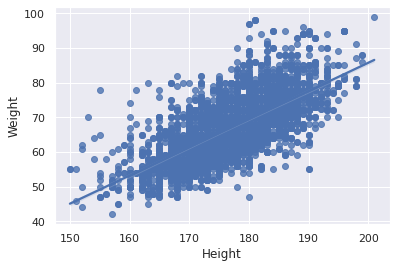

In [ ]:
sns.set_theme(color_codes=True)
sns.regplot(x='Height', y='Weight', data=r_numeric[r_numeric['Sex'] == 1])

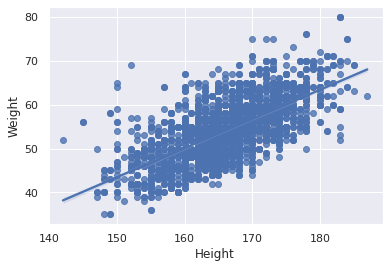

In [ ]:
sns.regplot(x='Height', y='Weight', data=r_numeric[r_numeric['Sex'] == 0])

In [ ]:
r_sprint = r_numeric.loc[(r_numeric['Event'] < 500)]
r_middle = r_numeric.loc[((r_numeric['Event'] > 700) & (r_numeric['Event'] < 1600))]
r_long = r_numeric.loc[(r_numeric['Event'] > 4000)]


# Test/Train split: X(All variables) -> y(Weight): 80% Train, 20% Test

In [ ]:
X_train_s, X_test_s, w_train_s, w_test_s = train_test_split(r_sprint[['Sex', 'Age','Height', 'Event', 'Year']], r_sprint['Weight'], random_state = 42, test_size = 0.2)
X_train_m, X_test_m, w_train_m, w_test_m = train_test_split(r_middle[['Sex', 'Age','Height', 'Event', 'Year']], r_middle['Weight'], random_state = 43, test_size = 0.2)
X_train_l, X_test_l, w_train_l, w_test_l = train_test_split(r_long[['Sex', 'Age','Height', 'Event', 'Year']], r_long['Weight'], random_state = 44, test_size = 0.2)

# Linear Regression

In [ ]:
regr_s = LinearRegression()
regr_m = LinearRegression()
regr_l = LinearRegression()

regr_s.fit(X_train_s, w_train_s)
regr_m.fit(X_train_m, w_train_m)
regr_l.fit(X_train_l, w_train_l)

w_pred_s = regr_s.predict(X_test_s)
w_pred_m = regr_m.predict(X_test_m)
w_pred_l = regr_l.predict(X_test_l)

print(r2_score(w_test_s, w_pred_s),r2_score(w_test_m, w_pred_m),r2_score(w_test_l, w_pred_l))

esd_s = np.sqrt(mean_squared_error(w_test_s, w_pred_s))
esd_m = np.sqrt(mean_squared_error(w_test_m, w_pred_m))
esd_l = np.sqrt(mean_squared_error(w_test_l, w_pred_l))

print(esd_s,esd_m,esd_l)

0.7522293775174569 0.8096582538325181 0.728610492264539
5.075215957601485 3.7727542156891674 3.7897896342231276


In [ ]:
print(regr_s.coef_,[float(i) for i in regr_m.coef_],[float(i) for i in regr_l.coef_])
print(regr_s.intercept_,regr_m.intercept_,regr_l.intercept_)

[ 8.41156984  0.11285475  0.63783763 -0.0086542   0.06968786] [5.550487455597479, 0.10197139872825182, 0.558837805178148, -0.003130011929567064, -0.0078018646581095915] [5.335467884466255, 0.0739733719125365, 0.54568917753583, 9.786730369887309e-06, -0.026040747138116563]
-189.22097428736998 -22.761939543825527 10.085980826797723



# A function with the linear model built in. Ready for copy to a blog post!

In [ ]:
import numpy as np

def weight_suggestor(Sex,Age,Height,Distance):

  # The linear models:
  coef_s = np.array([ 8.41156984,  0.11285475,  0.63783763, -0.0086542 ,  0.06968786])
  coef_m = np.array([5.550487455597479, 0.10197139872825182, 0.558837805178148, -0.003130011929567064, -0.0078018646581095915])
  coef_l = np.array([5.335467884466255, 0.0739733719125365, 0.54568917753583, 9.786730369887309e-06, -0.026040747138116563])
  intercept_s = -189.22097428736998
  intercept_m = -22.761939543825527
  intercept_l = 10.085980826797723
  esd_s = 5.075215957601485
  esd_m = 3.7727542156891674
  esd_l = 3.7897896342231276

  # Converting Sex input into binary if it is a string
  numeric_dictionary = {'F' : 0, 'M' : 1, 'Female' : 0, 'Male' : 1, 'female' : 0, 'male' : 1}
  
  if type(Sex) == str:
    Sex = numeric_dictionary[Sex]

  subject = np.array([Sex,Age,Height,Distance,2020])

  # Applying to the approapriate model
  if Distance < 600:
    weight = np.dot(coef_s,subject) + intercept_s
    dev = esd_s
  if Distance < 2500:
    weight = np.dot(coef_m,subject) + intercept_m
    dev = esd_m
  else:
    weight = np.dot(coef_l,subject) + intercept_l
    dev = esd_l

  return weight, weight - dev, weight + dev


In [ ]:
weight_suggestor('F',25,151.5,42195)

(42.41786739025132, 38.62807775602819, 46.20765702447444)

In [ ]:
weight_suggestor('M',25,175,42195)

(60.577030946809586, 56.78724131258646, 64.36682058103271)